In [5]:
import numpy as np
import pandas as pd
import pickle
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.densenet import DenseNet201, preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# Load the trained model
saved_model_path = 'drive/MyDrive/DeepLearninng/model.h5'
caption_model = load_model(saved_model_path)

# Load the tokenizer
tokenizer_path = 'drive/MyDrive/DeepLearning/tokenizer.pkl'
with open(tokenizer_path, 'rb') as f:
    tokenizer = pickle.load(f)

In [7]:
# Define the feature extractor model
base_model = DenseNet201()
fe = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)


82524592/82524592 [==============================] - 1s 0us/step


In [15]:

# Function to preprocess a custom image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    return image


In [16]:
# Function to generate a caption for a custom image
def generate_caption(model, tokenizer, photo, max_length):
    in_text = 'startseq'
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = word_for_id(yhat, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'endseq':
            break
    return in_text.replace('startseq ', '').replace(' endseq', '')

In [17]:
# Function to map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [11]:
from pathlib import Path

import matplotlib as mpl


fpath = Path(mpl.get_data_path(), "fonts/ttf/cmr10.ttf")
mpl.font_manager.fontManager.addfont(str(fpath))
plt.show()

In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

import matplotlib.font_manager as fm

# Load custom font for plotting captions
font_path = 'HelloGraduationSans-d9enl.ttf'  # Replace with your font file
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 50


def plot_image_caption(image_path, caption):
    # Load and plot image
    image = load_img(image_path)
    plt.imshow(image)
    plt.axis('off')

    # Format caption
    caption = caption.replace('<start>', '').replace('<end>', '')

    # Use the custom font for the title and increase font size
    plt.title(caption, loc='center', fontproperties=font_prop)
    plt.show()

# Main function to generate and plot captions for uploaded images
def generate(image_path):
    custom_image = preprocess_image(image_path)
    image_features = fe.predict(custom_image, verbose=0)
    caption = generate_caption(caption_model, tokenizer, image_features, max_length=15)
    plot_image_caption(image_path, caption)


Saving gotabaya-1.jpg to gotabaya-1.jpg


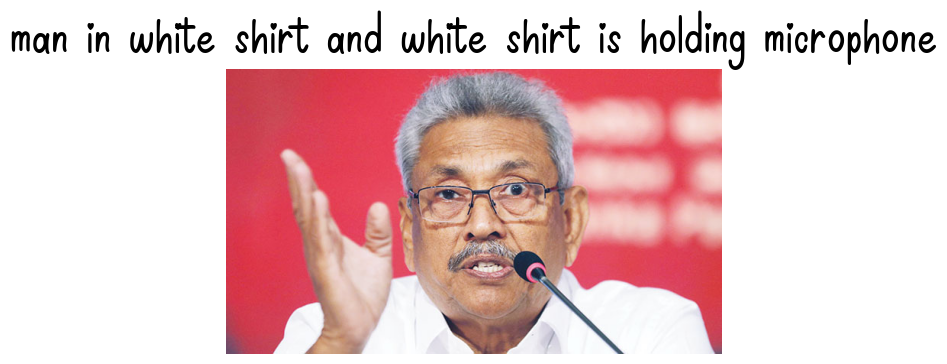

In [55]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)

Saving IMG-20221120-WA0043.jpg to IMG-20221120-WA0043.jpg


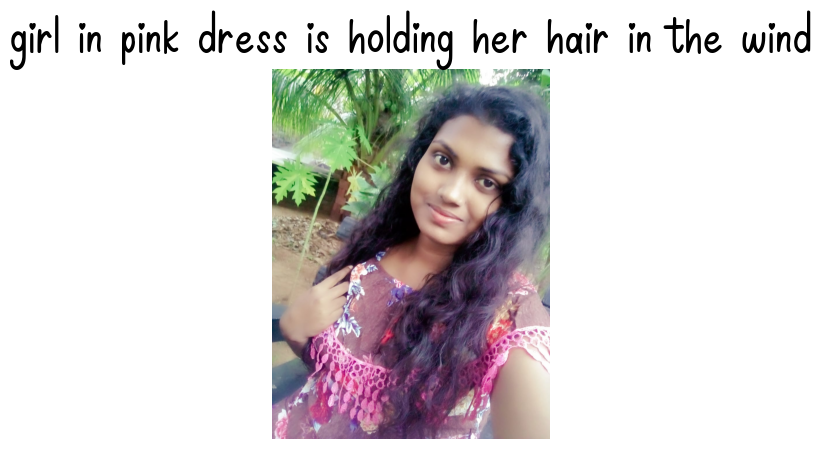

In [58]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)

Saving 23445819_3a458716c1.jpg to 23445819_3a458716c1.jpg


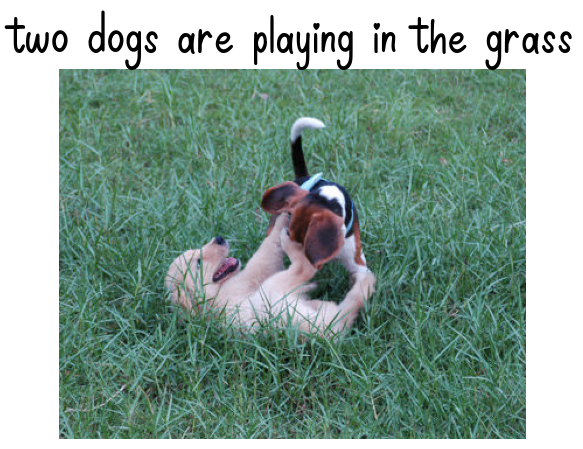

In [31]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)

Saving 123889082_d3751e0350.jpg to 123889082_d3751e0350.jpg


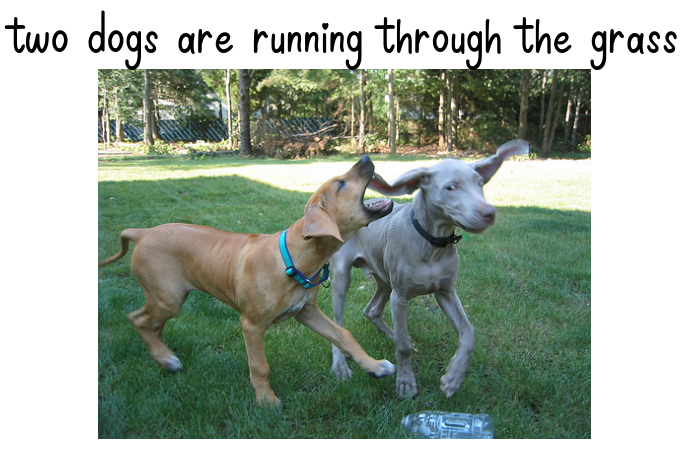

In [34]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)

Saving 3315110972_1090d11728.jpg to 3315110972_1090d11728.jpg


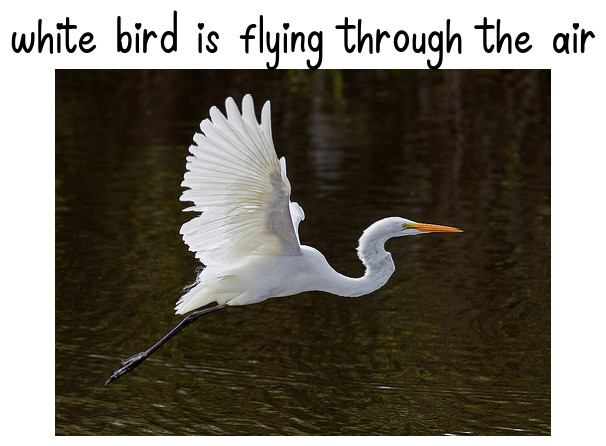

In [35]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)

Saving 3405942945_f4af2934a6.jpg to 3405942945_f4af2934a6.jpg


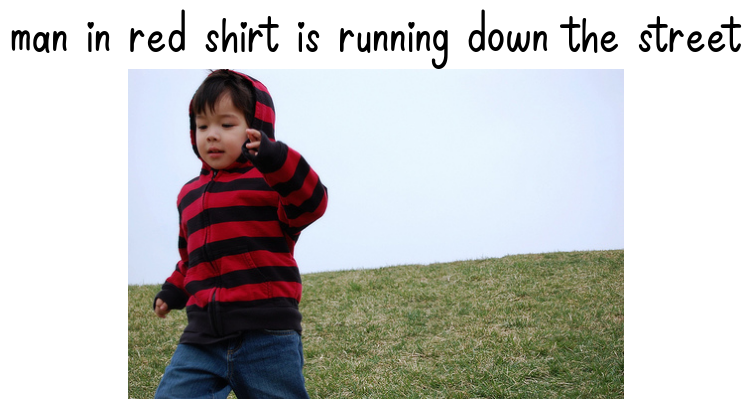

In [37]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)

Saving 12830823_87d2654e31.jpg to 12830823_87d2654e31 (1).jpg


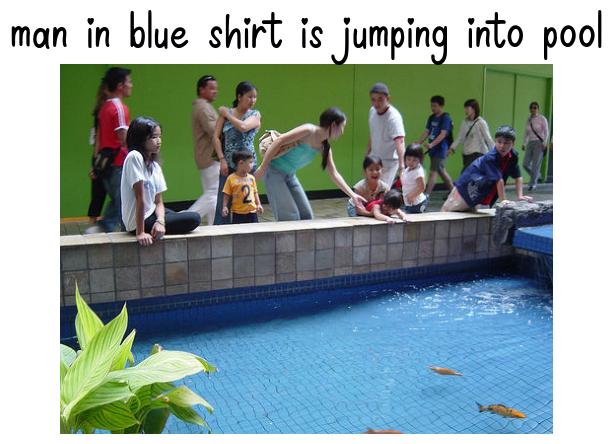

In [40]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)

Saving 3637013_c675de7705.jpg to 3637013_c675de7705 (3).jpg


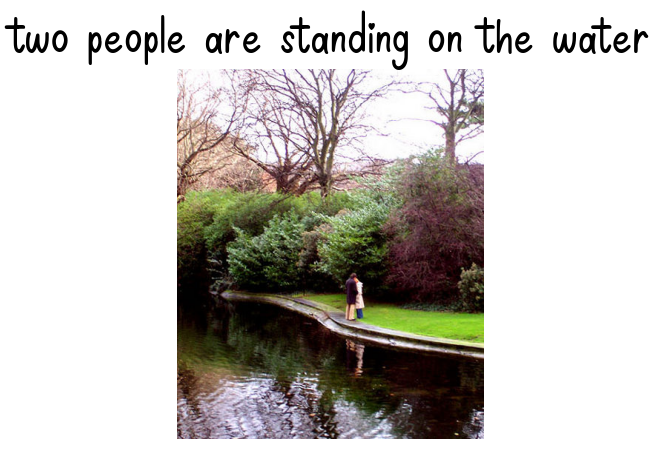

In [41]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)

Saving 3613375729_d0b3c41556.jpg to 3613375729_d0b3c41556.jpg


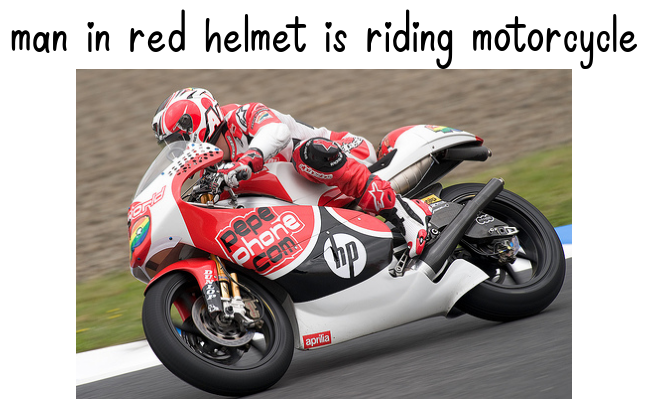

In [43]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)

Saving 2455286250_fb6a66175a.jpg to 2455286250_fb6a66175a.jpg


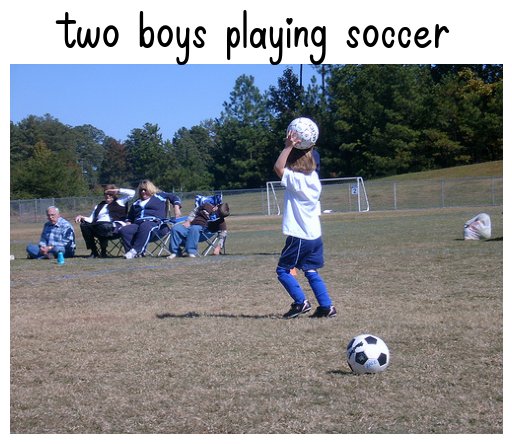

In [47]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)

Saving 3246991821_750a3097e2.jpg to 3246991821_750a3097e2.jpg


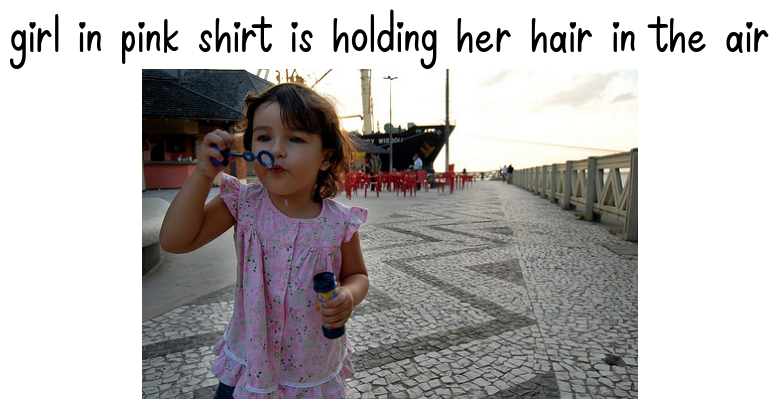

In [53]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)

Saving sri_lanka.jpg to sri_lanka.jpg


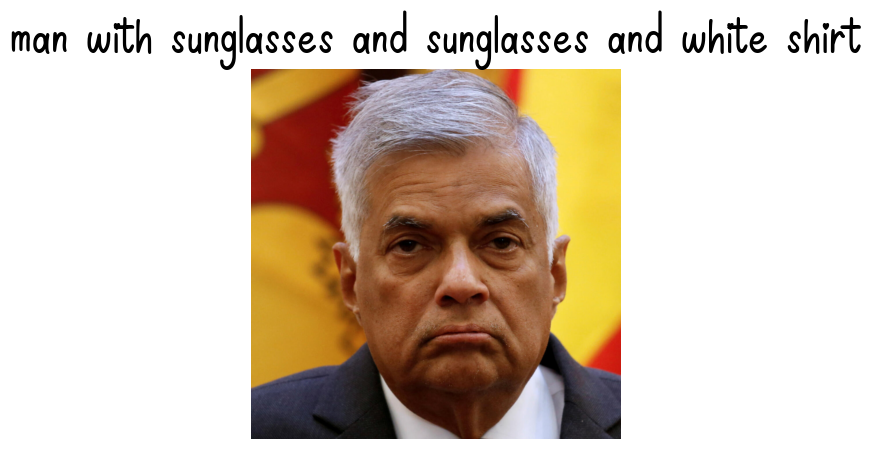

In [54]:
# Upload and generate captions for images
from google.colab import files
uploaded = files.upload()
for image_path in uploaded.keys():
    generate(image_path)